## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn import svm  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
df_iris = pd.read_csv('C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\iris.csv',
                       index_col = 'Unnamed: 0')

df_data = df_iris.drop('Species', axis = 1)

df_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


## Dataset의 대략적인 분포 확인

In [3]:
df_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

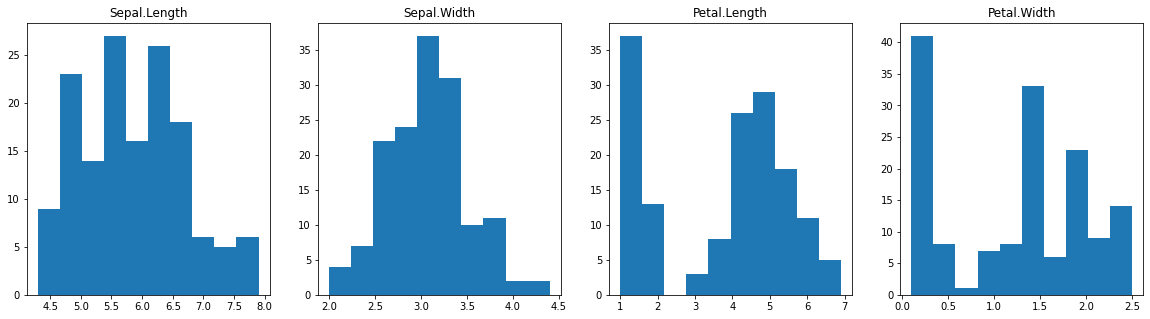

In [4]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(figsize=(20,5), nrows=1, ncols=4)

ax1.set_title('Sepal.Length')
ax1.hist(df_data['Sepal.Length'])

ax2.set_title('Sepal.Width')
ax2.hist(df_data['Sepal.Width'])

ax3.set_title('Petal.Length')
ax3.hist(df_data['Petal.Length'])

ax4.set_title('Petal.Width')
ax4.hist(df_data['Petal.Width'])

산점도 행렬
https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

In [ ]:
# sb.pairplot( df_iris, hue = 'Species')

# k-means 군집화 조건 설정
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

def kmeans(i):
    cluster_kmeans = KMeans( n_clusters = i,
                             init = 'random',
                             max_iter = 300,
                             random_state = 153 )
    return cluster_kmeans

# 모델 학습에 사용할 x값(예측변수) 설정

In [8]:
x = df_data[ ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'] ]

# k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택
- 
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

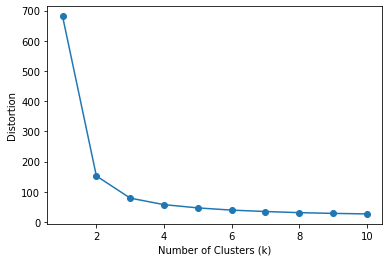

In [9]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for i in range(1,11):
    model = kmeans(i).fit(x)
    inertia.append(model.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

# 군집화 수행
- `sklearn.cluster.KMeans()`
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [10]:
# k를 2개로 설정하고 군집 모델 학습
model = kmeans(2).fit(x)

# 각각의 클러스터의 중심 확인
centers = model.cluster_centers_
print(centers)

[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [11]:
# 분류된 군집화 값 확인
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력

df_result = df_data.copy()

df_result['km_cluster'] = model.labels_

df_result.groupby( ['km_cluster'] ).count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
km_cluster,,,,
0,53,53,53,53
1,97,97,97,97


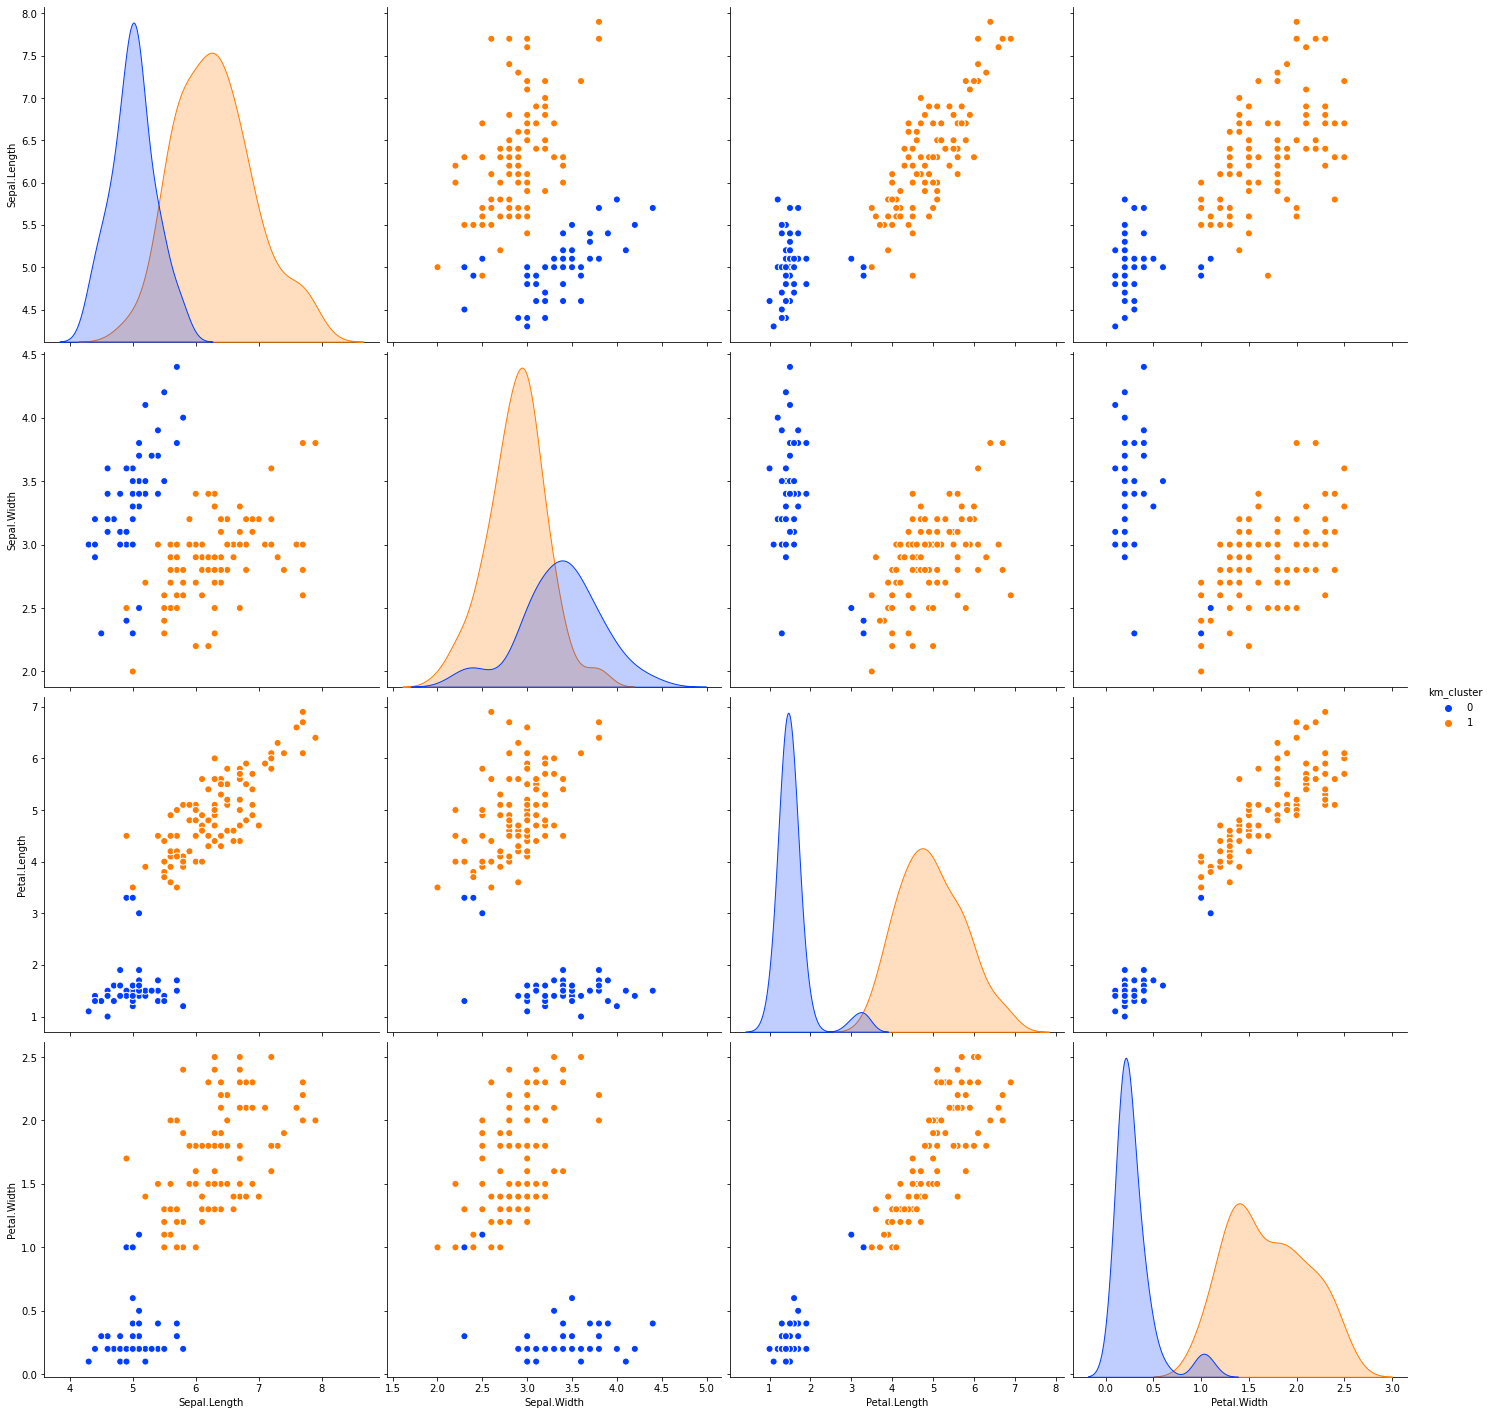

In [13]:
sb.pairplot( df_result,
             hue="km_cluster",
             palette='bright',
             size=5,
             plot_kws=dict(s=50, linewidth=1) )

# 평가

## 전체 데이터의 개별 실루엣 계수 산출
- `sklearn.metrics.silhouette_samples()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

In [14]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, model.labels_ )

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
print()
score_samples

silhouette_samples( ) return 값의 shape (150,)



array([0.85222463, 0.82691627, 0.83542604, 0.81924938, 0.84873095,
       0.76720908, 0.82934134, 0.85502806, 0.77726197, 0.83455018,
       0.81046131, 0.84222024, 0.82253478, 0.76729412, 0.72053353,
       0.67066105, 0.78513177, 0.85108451, 0.73302036, 0.82472323,
       0.80110411, 0.8306016 , 0.80054559, 0.81307005, 0.79839475,
       0.81633577, 0.84102272, 0.84419398, 0.84537872, 0.8298386 ,
       0.82859427, 0.81127842, 0.77396266, 0.73789552, 0.83787156,
       0.83635801, 0.80281102, 0.8426328 , 0.78831503, 0.85196512,
       0.8491337 , 0.68955963, 0.80129264, 0.81473797, 0.77157995,
       0.82303672, 0.81973645, 0.82835951, 0.82297915, 0.85340824,
       0.65738932, 0.67275607, 0.69882445, 0.45134843, 0.70213688,
       0.62644404, 0.69541802, 0.07236209, 0.67966627, 0.37112501,
       0.07037111, 0.60032206, 0.4630224 , 0.70314805, 0.29941062,
       0.64358008, 0.62224448, 0.49877067, 0.64331724, 0.41482364,
       0.69590266, 0.5447286 , 0.71784072, 0.67922809, 0.63283

In [15]:
# df_result에 실루엣 계수 컬럼 추가
df_result['silhouette_coeff'] = score_samples
df_result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,km_cluster,silhouette_coeff
1,5.1,3.5,1.4,0.2,0,0.852225
2,4.9,3.0,1.4,0.2,0,0.826916
3,4.7,3.2,1.3,0.2,0,0.835426
4,4.6,3.1,1.5,0.2,0,0.819249
5,5.0,3.6,1.4,0.2,0,0.848731
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,1,0.724297
147,6.3,2.5,5.0,1.9,1,0.730283
148,6.5,3.0,5.2,2.0,1,0.747297
149,6.2,3.4,5.4,2.3,1,0.702502


In [18]:
# 군집별 평균 실루엣 계수
df_result.groupby('km_cluster')['silhouette_coeff'].mean()

km_cluster
0    0.769526
1    0.632701
Name: silhouette_coeff, dtype: float64

## 평균 실루엣 계수 산출
- `sklearn.metrics.silhouette_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [19]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, model.labels_ )

print( 'Silhouette Analysis Score: {0:.4f}'.format(average_score) )

Silhouette Analysis Score: 0.6810


## k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score >

k = 2 :  0.6810461692117464
k = 3 :  0.5528190123564101
k = 4 :  0.4980505049972878
k = 5 :  0.4930804067193526
k = 6 :  0.36648040289008416



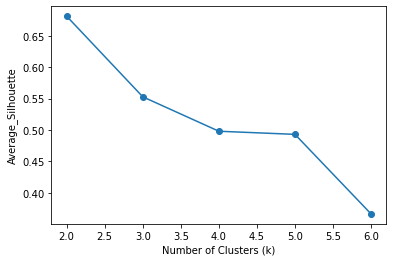

In [20]:
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정

avg_silhouette = list()

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x)

    average_score = silhouette_score( x, model.labels_ )
    print( 'k =',i,': ', average_score )

    avg_silhouette.append(average_score)
    
print()

plt.plot(range(2,7), avg_silhouette, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average_Silhouette')
plt.show()

In [21]:
# 군집별 실루엣 계수와 평균 실루엣 계수를 비교

print('< Average_Silhouette_Score >')
print()

for i in range(2,7):
    model = kmeans(i).fit(x)
    
    score_samples = silhouette_samples( x, model.labels_ )
    average_score = silhouette_score( x, model.labels_ )
    
    df = pd.DataFrame( { 'group' : model.labels_,
                         'Coeff' : score_samples,
                         'Avg' : average_score } )
    
    df['Coeff-avg'] = df['Coeff'] - df['Avg']
    
    display( df.groupby('group')[ ['Coeff','Avg','Coeff-avg'] ].mean() )
    
    print()

< Average_Silhouette_Score >



,Coeff,Avg,Coeff-avg
group,,,
0,0.769526,0.681046,0.088480
1,0.632701,0.681046,-0.048345


,Coeff,Avg,Coeff-avg
group,,,
0,0.417320,0.552819,-0.135499
1,0.798140,0.552819,0.245321
2,0.451105,0.552819,-0.101714


,Coeff,Avg,Coeff-avg
group,,,
0,0.419518,0.498051,-0.078532
1,0.362998,0.498051,-0.135052
2,0.763176,0.498051,0.265125
3,0.321324,0.498051,-0.176727


,Coeff,Avg,Coeff-avg
group,,,
0,0.763176,0.49308,0.270095
1,0.342779,0.49308,-0.150301
2,0.398519,0.49308,-0.094561
3,0.405827,0.49308,-0.087254
4,0.299765,0.49308,-0.193315


,Coeff,Avg,Coeff-avg
group,,,
0,0.359125,0.36648,-0.007356
1,0.404650,0.36648,0.038170
2,0.408982,0.36648,0.042502
3,0.289906,0.36648,-0.076574
4,0.424343,0.36648,0.057863
5,0.342779,0.36648,-0.023701


# [참고] 실제 iris data와 비교

In [ ]:
# iris 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_iris['km_cluster'] = model.labels_

df_iris.groupby( ['Species', 'km_cluster'] ).count()

In [ ]:
# 실제 값과 군집화된 값들을 비교하여 
# 분류된 군집화 값들에 해당하는 Species 이름을 데이터프레임에 입력

df_iris['km_cluster'] = df_iris['km_cluster'].apply( lambda x: 'setosa' if 0 == x
                                                     else ('versicolor' if 1 == x
                                                     else 'virginica') )
df_iris.groupby( ['Species', 'km_cluster'] ).count()

In [ ]:
# 실제 iris 데이터의 군집

sb.pairplot( df_iris.drop('km_cluster', axis = 1),
             hue="Species",
             size=5,
             plot_kws=dict(s=50, linewidth=1) )